# Anomaly Detection (Deteccion de Anomalias)
No es supervisado, pero puede ser semi-supervisado, por que pueden usar muestras con etiquetas para ajustar el $\epsilon$.
De esto hablamos mas abajo.
Tambien lo llamamos "outlier detection".

La idea es detectar muestas que estan lejos de la **normal**.

## Aplicaciones.

* Fraude, bancario, tarjetas de credito, etc.
* Defectos de manufactura.
* Monitoreo de salud. Deteccion de tumores.
* Prevencion de crimen. Manejo de camaras para detectar situaciones inusuales.


## Metodos usados para deteccion de anomalias.

* Estadistico (el que usamos aca)
* Basados en proximidad
* Basados en densidad y
* "clustering" (agrupamiento).


### Metodos basados en estadisticas.

#### Distribucion normal
Definimos la distribucion normal (Gaussiana)

$$p(x; \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2) =\frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{-\frac{(x-\mu)^2}{2 \sigma^2}} .$$




Definamos el contexto de la distribucion **normal**
$x \in \mathbb{R}$, $\mu, \sigma \in \mathbb{R}$
El valor $p(x; \mu, \sigma^2)$ es la probabilidad de un evento
con media $\mu$, varianza $\sigma^2$, dados

Si se tienen un conjunto de muestras $x^{(i)}$, $i=1,2, \cdots, m$, entonces

\begin{eqnarray}
    \mu &=& \frac1m \sum_{i=1}^m x^{(i)} \\
    \sigma^2 &=& \frac1m \sum_{i=1}^m ( x^{(i)}-\mu)^2
\end{eqnarray}

Con esta distribucion se puede calcular la probabilidad de que un evento esten $a \le x \le b$, con la formula


$$p(a \le x \le b ) = \int_a^b p(x; \mu, \sigma^2) dx .$$





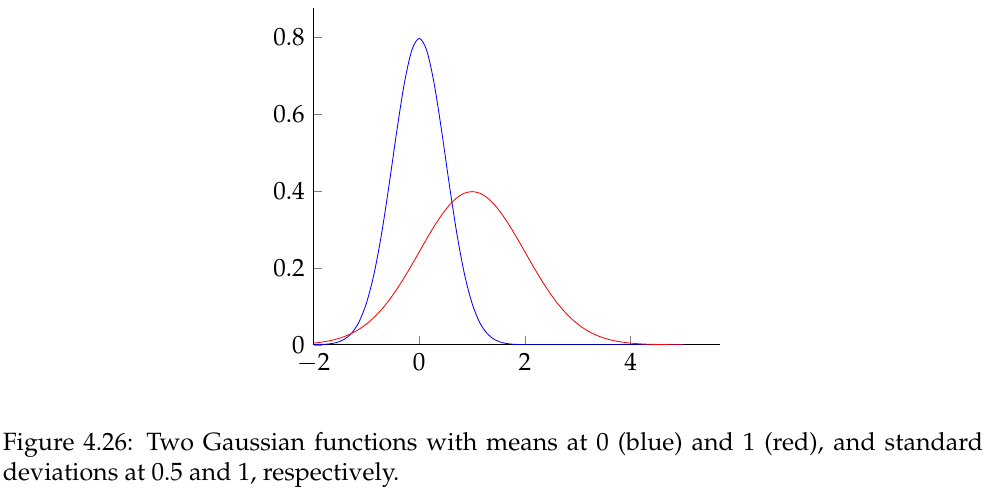

En la grafica anterior las medias son $0$ (azul) y $1$ para (roja). Las desviaciones estandard $\sigma=0.5,1$ para los colores azul y rojo respectivamente.

Que es una anomalia?
Debemos definir un umbral $\epsilon$, el evento $x$ es anomalo si


$$p(x; \mu, \sigma^2) < \epsilon .$$

Que pasa si ahora en vez escalares tenemos vectores. Es decir $x \in \mathbb{R}^n$, igual $\mu \in \mathbb{R}^n, \sigma^2 \in \mathbb{R}$. Los definimos

\begin{eqnarray}
    \mu &=& \frac1m \sum_{i=1}^m x^{(i)} \\
    \sigma^2 &=& \frac1m \sum_{i=1}^m \| x^{(i)} - \mu \|^2
\end{eqnarray}

Aca
$$\mu_j = \frac1m \sum_{i=1}^m x_j^{(i)}$$

$$\sigma_j = \frac1m \sum_{i=1}^m  \| x_j^{(i)}- \mu_j \|$$


Como calculamos la distribucion normal en este caso?

Inicialmente asumimos que los eventos son independientes.
Si los eventos son **independientes** la probabilidad del conjunto es el producto de las probabilidades.
Aca $x^{(i)}, i = 1, \cdots , m$ es un vector con componentes $x_j^{(i)}, j=1, \cdots n$


$$p(x^{(i)}; \mu , \sigma_j^2) = \prod_{j=1}^m p(x_j^{(i)}; \mu_j, \sigma^2) = \frac{1}{\sqrt{(2 \pi)^n \prod_{j=1}^n \sigma_j } } \exp \left (-\sum_{i=1}^n \frac{(x_j^{(i)} - \mu_j)}{2 \sigma_j}^2  \right ) \tag{1} .$$




## Distribucion normal multivariada.
Lo que vimos arriba es una distribucion multivariada pero para el caso en que los eventos $x^{(i)}_j$ y $x^{(i)}_k$ sean idependientes. Pero que pasa si son dependientes?


Tenemos que definir la dependencia entre los eventos.
Definimos el concepto de matriz de **covarianza**


$$\Sigma = \frac1m (X - \mu)^T ( X - \mu) .$$
donde

$$ \mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} .$$
$X$ son los datos, las filas de la matriz $X$ son $x^{(i)} \in \mathbb{R}^n$.

En este caso la distribucion normal multivariada esta dada por


$$p(x, \mu, \Sigma) = \mathcal{N}(\mu, \Sigma) = \frac{1}{\sqrt{ (2 \pi)^n | \det \Sigma |}} \mathrm{e}^{-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu)} \tag{2} .$$

La matriz $\Sigma^{-1}$ se llama **matriz de concentracion** (concentration matrix).

Un comentario de la matrix de covarianza


$$\Sigma_{ij} = \text{cov}[ x^{(i)}, x^{(j)}] = \mathbb{E}[ (x^{(i)} - \mu_i)^T(x^{(j)}-\mu_j)]  .$$

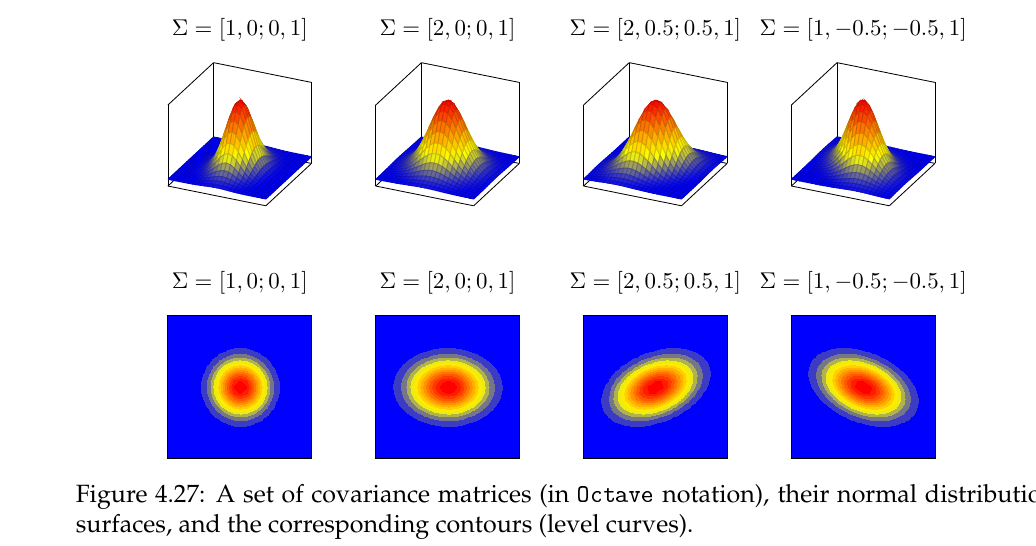

La notacion de matrices en la grafica anterior es la de `MatLab`
Por ejemplo

$$[1, -0.5; -0.5, 1] \to  \begin{pmatrix}
1 & -0.5 \\
-0.5 & 1
\end{pmatrix} .$$

Los contornos (curvas de nivel) que se muestran corresponden a la ecuacion


$$-\frac12 (x - \mu)^T \Sigma^{-1} (x - \mu) = \text{constante} .$$

Un caso particular importante pasa cuando la matriz de covarizanza es diagonal.


\begin{eqnarray}
\Sigma =
\begin{pmatrix}
\sigma_1^2 & 0 & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^2 & \ddots &        &        & \vdots \\
\vdots & \ddots  & \sigma_3^2 & \ddots & & \vdots \\
\vdots &   & \ddots & \ddots & \ddots & \vdots  \\
\vdots &   &  & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^2
\end{pmatrix} \tag{3}
\end{eqnarray}

Vamos a ver que cuando $\Sigma$ es como en la Ecuacion (3)
ocurre exactamente que los eventos son **estadisticamente independientes** y la ecuacion  (2) se reduce a la ecuacion (1).


Pensemos en la ecaucion (2).
Para el coeficiente necesitamos el determinante.

$$\det \Sigma = \prod_{j=1}^n \sigma_j^2 $$
de forma que el coeficiente en la Ecuacion (2) se convierte
en el coeficiente de la Ecuacion (1).


$$\frac{1}{\sqrt{(2 \pi)^n |\det \Sigma |}} = \frac{1}{\sqrt{ (2 \pi)^n \prod_{j=1}^n \sigma_j^2}} .$$

\begin{eqnarray}
\Sigma^{-1} =
\begin{pmatrix}
\sigma_1^2 & 0 & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^{-2} & \ddots &        &        & \vdots \\
\vdots & \ddots  & \sigma_3^{-2} & \ddots & & \vdots \\
\vdots &   & \ddots & \ddots & \ddots & \vdots  \\
\vdots &   &  & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & \cdots & 0 & \sigma_n^{-2}
\end{pmatrix} \tag{3}
\end{eqnarray}

El exponente en la Ecuacion (2) es


$$-\frac12 (x^{(i)}-\mu)^T \Sigma^{-1}(x^{(i)}- \mu) .
=-\frac12 \sum_{j=1}^n \frac{(x_j^{(i)} - \mu_j)}{\sigma_j^2} $$

pero este precisamente es el exponente en la Ecuacion (1).



### Algoritmo
Se tien una matriz de datos $X$ y un $\epsilon$.

* Se tiene $m$ muestras independientes $x^{(i)}$ para ser probadas $i=1,2, \cdots , m$.

* Se encuentran las medias $\mu_1, \mu_2, \cdots, \mu_n$ y las varianzas $\sigma_1^2, \sigma_2^2 , \cdots \sigma_n^2$, mediante las formulas


$$ \mu_i = \frac1m \sum_{j=1}^m x_i^{(j)} \quad i=1,2, \cdots, n .$$
$$ \sigma_i^2 = \frac1m \sum_{j=1}^m ( x_j^{(i)} - \mu_i)^2 \quad i=1,2, \cdots, n $$

 * Se calcula la probabilidad
 $$p(x^{(i)}; \mu , \sigma_j^2) = \prod_{j=1}^m p(x_j^{(i)}; \mu_j, \sigma^2) = \frac{1}{\sqrt{(2 \pi)^n \prod_{j=1}^n \sigma_j } } \exp \left (-\sum_{i=1}^n \frac{(x_j^{(i)} - \mu_j)}{2 \sigma_j}^2  \right ) \tag{1} .$$

 * Finalmente se encuentran los $x$ tales que $p(x) < \epsilon$.


Que pasa si los datos no son independientes estadisticamente hablando? Toca usar la matriz de covarianza $\Sigma$ (Ecuacion (2)).


## Proxima Clase.
### Recommender Systems: Sistemas de recomendacion. (semi-supervisado)
* Netflix
* Amazon
* Spotify
* YouTube